# COVID-19 Data Visualization and Exploratory Data Analysis

## Data Source
The following is a portfolio project in which the Our World in Data Covid-19 dataset is explored.  A copy of the dataset can be found at [this site](https://github.com/owid/covid-19-data/tree/master/public/data).

The data comes from the COVID-19 Data Repository by the Center of Systems Science and Engineering (CSSE) at Johns Hopkins University.  The dataset contains data regarding confirmed cases and deaths, hospitalizations, testing for COVID-19, vaccinations against COVID-19, and other variables.  In this notebook, we will perform exploratory data analysis on the COVID-19 dataset.  Run the code snippet below to prepare this Jupyter notebook.

## Data Ingestion
Ingested the data into a SQL server instance.  The data should have two tables: CovidDeaths and CovidVaccinations.  Alternatively, use the code below to create the database in your SQL server instance.

### CovidDeaths spreadsheet fields: 
The CovidDeaths spreadsheet file should have these fields in the following order:

iso_code, continent, location, date, population, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests

### CovidVaccination spreadsheet fields: 
The CovidVaccination spreadsheet file should have these fields in the following order:

iso_code, continent, location, date, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million

Finally, import these two files to create two tables: PorfolioProject..CovidDeaths and PorfolioProject..CovidVaccination

## Connect to the database
Finally, connect to the database that has been created and next we will explore the data set!

In [4]:
# import packages

import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
import pandas as pd

#connect to the db
cnxn_str = ("Driver={SQL Server Native Client 11.0};"
            "Server=EnterYourServerNameHere;"
            "Database=EnterYourDBNameHere;"
            "UID=EnterYourUserNameHere;"
            "PWD=EnterYourPWHere;")
cnxn = pyodbc.connect(cnxn_str)

## EDA
Code for the exploratory data analysis on COVID dataset is below.
#### First exploration of CovidDeaths and CovidVaccinations dataset.


In [115]:
first_query = """
        Select * 
        From PortfolioProject..CovidDeaths
        where continent is not null
        order by 3,4
        """ 
data = pd.read_sql(first_query, cnxn)
print(data.head)

second_query = """
        Select * 
        From PortfolioProject..CovidVaccinations
        Where continent is not null
        order by 3,4
        """
data = pd.read_sql(second_query, cnxn)
print(data.head)

third_query = """
        Select Location, date, total_cases, new_cases, total_deaths, population
        From PortfolioProject..CovidDeaths
        Where continent is not null
        order by 1,2
        """
data = pd.read_sql(third_query, cnxn)
print(data.head)

c:\Users\Jen\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



<bound method NDFrame.head of        iso_code continent     location        date  population  total_cases  \
0           AFG      Asia  Afghanistan  2020-02-24  40099462.0          5.0   
1           AFG      Asia  Afghanistan  2020-02-25  40099462.0          5.0   
2           AFG      Asia  Afghanistan  2020-02-26  40099462.0          5.0   
3           AFG      Asia  Afghanistan  2020-02-27  40099462.0          5.0   
4           AFG      Asia  Afghanistan  2020-02-28  40099462.0          5.0   
...         ...       ...          ...         ...         ...          ...   
206562      ZWE    Africa     Zimbabwe  2022-09-21  15993524.0     257156.0   
206563      ZWE    Africa     Zimbabwe  2022-09-22  15993524.0     257259.0   
206564      ZWE    Africa     Zimbabwe  2022-09-23  15993524.0     257289.0   
206565      ZWE    Africa     Zimbabwe  2022-09-24  15993524.0     257318.0   
206566      ZWE    Africa     Zimbabwe  2022-09-25  15993524.0     257340.0   

        new_cases  ne

c:\Users\Jen\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



<bound method NDFrame.head of        iso_code continent     location        date total_tests new_tests  \
0           AFG      Asia  Afghanistan  2020-02-24        None      None   
1           AFG      Asia  Afghanistan  2020-02-25        None      None   
2           AFG      Asia  Afghanistan  2020-02-26        None      None   
3           AFG      Asia  Afghanistan  2020-02-27        None      None   
4           AFG      Asia  Afghanistan  2020-02-28        None      None   
...         ...       ...          ...         ...         ...       ...   
206562      ZWE    Africa     Zimbabwe  2022-09-21        None      None   
206563      ZWE    Africa     Zimbabwe  2022-09-22        None      None   
206564      ZWE    Africa     Zimbabwe  2022-09-23        None      None   
206565      ZWE    Africa     Zimbabwe  2022-09-24        None      None   
206566      ZWE    Africa     Zimbabwe  2022-09-25        None      None   

       total_tests_per_thousand new_tests_per_thousand ne

c:\Users\Jen\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



<bound method NDFrame.head of            Location        date  total_cases  new_cases total_deaths  \
0       Afghanistan  2020-02-24          5.0        5.0         None   
1       Afghanistan  2020-02-25          5.0        0.0         None   
2       Afghanistan  2020-02-26          5.0        0.0         None   
3       Afghanistan  2020-02-27          5.0        0.0         None   
4       Afghanistan  2020-02-28          5.0        0.0         None   
...             ...         ...          ...        ...          ...   
206562     Zimbabwe  2022-09-21     257156.0        0.0         5598   
206563     Zimbabwe  2022-09-22     257259.0      103.0         5598   
206564     Zimbabwe  2022-09-23     257289.0       30.0         5599   
206565     Zimbabwe  2022-09-24     257318.0       29.0         5599   
206566     Zimbabwe  2022-09-25     257340.0       22.0         5599   

        population  
0       40099462.0  
1       40099462.0  
2       40099462.0  
3       40099462.0  


#### Looking at Total Cases vs. Total Deaths
#### Shows likelihood of dying if you contract COVID in the US.

In [116]:
query_deathlikelihood_us = """
    Select Location, date, total_cases, total_deaths, (total_deaths/total_cases)*100 AS DeathPercentage
    From PortfolioProject..CovidDeaths
    where Location like '%states%' and continent is not null
    order by 1,2
    """
deathlikelihood_us = pd.read_sql(query_deathlikelihood_us, cnxn)
print(deathlikelihood_us.head)

<bound method NDFrame.head of                           Location        date  total_cases total_deaths  \
0                    United States  2020-01-22          1.0         None   
1                    United States  2020-01-23          1.0         None   
2                    United States  2020-01-24          2.0         None   
3                    United States  2020-01-25          2.0         None   
4                    United States  2020-01-26          5.0         None   
...                            ...         ...          ...          ...   
1791  United States Virgin Islands  2022-06-15          NaN         None   
1792  United States Virgin Islands  2022-06-16          NaN         None   
1793  United States Virgin Islands  2022-06-17          NaN         None   
1794  United States Virgin Islands  2022-06-18          NaN         None   
1795  United States Virgin Islands  2022-06-19          NaN         None   

      DeathPercentage  
0                 NaN  
1        

c:\Users\Jen\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



#### Looking at Total Cases vs. Population.

In [11]:
query_case_v_population = """
    Select Location, date, total_cases, population, (total_cases/population)*100 as CasePercentage
    From PortfolioProject..CovidDeaths
    Where continent is not null
    order by 1,2
    """
case_v_population = pd.read_sql(query_case_v_population, cnxn)
print(case_v_population.head)

c:\Users\Jen\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



<bound method NDFrame.head of            Location        date  total_cases  population  CasePercentage
0       Afghanistan  2020-02-24          5.0  40099462.0        0.000012
1       Afghanistan  2020-02-25          5.0  40099462.0        0.000012
2       Afghanistan  2020-02-26          5.0  40099462.0        0.000012
3       Afghanistan  2020-02-27          5.0  40099462.0        0.000012
4       Afghanistan  2020-02-28          5.0  40099462.0        0.000012
...             ...         ...          ...         ...             ...
206562     Zimbabwe  2022-09-21     257156.0  15993524.0        1.607876
206563     Zimbabwe  2022-09-22     257259.0  15993524.0        1.608520
206564     Zimbabwe  2022-09-23     257289.0  15993524.0        1.608707
206565     Zimbabwe  2022-09-24     257318.0  15993524.0        1.608889
206566     Zimbabwe  2022-09-25     257340.0  15993524.0        1.609026

[206567 rows x 5 columns]>


#### Looking at Countries with Highest Infection Rate Compared to Populations

In [5]:
query_max_infection_Rate_v_Population = """
    Select Location, population, MAX(total_cases) as HighestInfectionCount, Max(total_cases/population)*100 as PercentPopulationInfected
    From PortfolioProject..CovidDeaths
    Where continent is not null
    Group by Location, Population
    order by PercentPopulationInfected desc
    """
max_infection_Rate_v_Population = pd.read_sql(query_max_infection_Rate_v_Population, cnxn)
print(max_infection_Rate_v_Population.head)

<bound method NDFrame.head of                          Location  population  HighestInfectionCount  \
0                  Faeroe Islands     52888.0                34658.0   
1                          Cyprus    896007.0               585313.0   
2                       Gibraltar     32670.0                20092.0   
3                      San Marino     33746.0                20646.0   
4                         Andorra     79034.0                46147.0   
..                            ...         ...                    ...   
226  United States Virgin Islands    100091.0                    NaN   
227                        Jersey    109618.0                    NaN   
228     Sint Maarten (Dutch part)     44042.0                    NaN   
229                Western Sahara    565581.0                    NaN   
230                          Niue      1937.0                    NaN   

     PercentPopulationInfected  
0                    65.530933  
1                    65.324601  
2     

c:\Users\Jen\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


#### Showing Countries with Highest Death Count per Population

In [119]:
query_highest_death_count_per_pop = """
    Select Location, MAX(cast(total_deaths as int)) as TotalDeathCount
    From PortfolioProject..CovidDeaths
    Where continent is not null
    Group by Location
    order by TotalDeathCount desc
"""

highest_death_count_per_pop = pd.read_sql(query_highest_death_count_per_pop, cnxn)
print(highest_death_count_per_pop.head)

<bound method NDFrame.head of                          Location  TotalDeathCount
0                   United States        1056416.0
1                          Brazil         685750.0
2                           India         528530.0
3                          Russia         378935.0
4                          Mexico         330043.0
..                            ...              ...
226                        Jersey              NaN
227     Sint Maarten (Dutch part)              NaN
228                       Vatican              NaN
229  United States Virgin Islands              NaN
230                  Turkmenistan              NaN

[231 rows x 2 columns]>


c:\Users\Jen\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



#### Break things down by continent

In [120]:
query_continent_v_death = """
    Select continent, MAX(cast(total_deaths as int)) as TotalDeathCount
    From PortfolioProject..CovidDeaths
    Where continent is not null
    Group by continent
    Order by TotalDeathCount desc
    """
continent_v_death = pd.read_sql(query_continent_v_death, cnxn)
print(continent_v_death.head)

<bound method NDFrame.head of        continent  TotalDeathCount
0  North America          1056416
1  South America           685750
2           Asia           528530
3         Europe           378935
4         Africa           102169
5        Oceania            14928>


c:\Users\Jen\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



#### GLOBAL NUMBERS

In [121]:
query_daily_global_deaths = """
    Select date, sum(new_cases) as total_cases, sum(cast(new_deaths as int)) as total_deaths, SUM(cast(new_deaths as int))/SUM(new_cases)*100 as DeathPercentage
    From PortfolioProject..CovidDeaths
    where continent is not null
    group by date
    order by 1,2
    """
daily_global_deaths = pd.read_sql(query_daily_global_deaths, cnxn)
print(daily_global_deaths.head)

query_global_deaths_and_cases = """
    Select sum(cast(new_cases as int)) as total_cases, sum(cast(new_deaths as int)) as total_deaths, SUM(cast(new_deaths as int))/SUM(new_cases)*100 as DeathPercentage
    From PortfolioProject..CovidDeaths
    where continent is not null
    order by 1,2
    """
global_deaths_and_cases = pd.read_sql(query_global_deaths_and_cases, cnxn)
print(global_deaths_and_cases.head)

c:\Users\Jen\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



<bound method NDFrame.head of            date  total_cases  total_deaths  DeathPercentage
0    2020-01-01          NaN           NaN              NaN
1    2020-01-02          NaN           NaN              NaN
2    2020-01-03          NaN           NaN              NaN
3    2020-01-04          NaN           NaN              NaN
4    2020-01-05          NaN           NaN              NaN
..          ...          ...           ...              ...
994  2022-09-21     516336.0        1998.0         0.386957
995  2022-09-22     612301.0        2458.0         0.401437
996  2022-09-23     514567.0        1823.0         0.354278
997  2022-09-24     262296.0         741.0         0.282505
998  2022-09-25     221691.0         456.0         0.205692

[999 rows x 4 columns]>


c:\Users\Jen\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



<bound method NDFrame.head of    total_cases  total_deaths  DeathPercentage
0    613366757       6498531         1.059485>


#### Looking at Total Population versus Vaccinations

In [122]:
query_total_pop_v_vac = """
    Select dea.continent, dea.location, dea.date, dea.population,  
    SUM(cast(vac.new_vaccinations as BIGINT)) OVER (Partition by dea.Location Order by dea.location, dea.date) as cumulative_vaccination, 
    sum(cast(dea.new_deaths as BIGINT)) OVER (partition by dea.Location Order by dea.location, dea.date) as cumulative_deaths
    From PortfolioProject..CovidDeaths dea
    Join PortfolioProject..CovidVaccinations vac
    on dea.location = vac.location
    and dea.date = vac.date
    where dea.continent is not null
    order by 2,3
    """
total_pop_v_vac = pd.read_sql(query_total_pop_v_vac, cnxn)
print(total_pop_v_vac.head)

c:\Users\Jen\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



<bound method NDFrame.head of        continent     location        date  population  cumulative_vaccination  \
0           Asia  Afghanistan  2020-02-24  40099462.0                     NaN   
1           Asia  Afghanistan  2020-02-25  40099462.0                     NaN   
2           Asia  Afghanistan  2020-02-26  40099462.0                     NaN   
3           Asia  Afghanistan  2020-02-27  40099462.0                     NaN   
4           Asia  Afghanistan  2020-02-28  40099462.0                     NaN   
...          ...          ...         ...         ...                     ...   
206562    Africa     Zimbabwe  2022-09-21  15993524.0              10767732.0   
206563    Africa     Zimbabwe  2022-09-22  15993524.0              10767732.0   
206564    Africa     Zimbabwe  2022-09-23  15993524.0              10767732.0   
206565    Africa     Zimbabwe  2022-09-24  15993524.0              10767732.0   
206566    Africa     Zimbabwe  2022-09-25  15993524.0              10767732.0  

## Data Visualizations

### Global Averages
The code below generates a table of the global case count, global death count, and the percentages of cases that resulted in fatality.

In [123]:
from tabulate import tabulate

print(tabulate(global_deaths_and_cases, showindex=False, headers = ['Total Cases', 'Total Deaths', 'Death Percentage'], floatfmt=(".0f", ".0f",".2f")) )

  Total Cases    Total Deaths    Death Percentage
-------------  --------------  ------------------
    613366757         6498531                1.06


### Total Deaths Per Continent
The code below generates a bar chart visualization of the total deaths per continent in the data set.

C:\Users\Jen\AppData\Local\Temp\ipykernel_3024\2843529740.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jen\AppData\Local\Temp\ipykernel_3024\2843529740.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



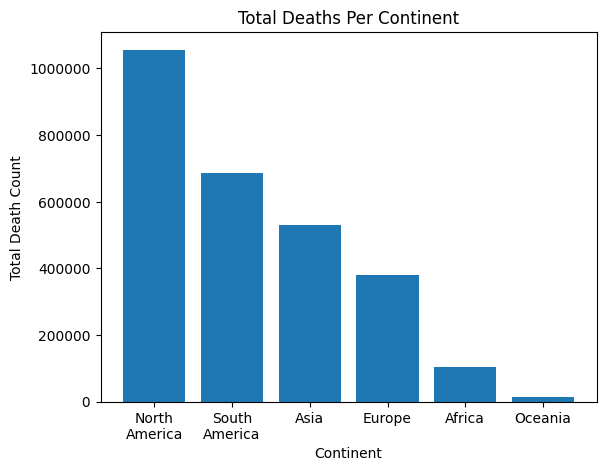

In [124]:
#grab the data from the dataframe
continent = continent_v_death.iloc[:, 0]
death_count = continent_v_death.iloc[:, 1]

#fixing the formatting so the labels don't overlap on the bar chart.
continent[0] = "North\nAmerica"
continent[1] = "South\nAmerica"

#formating the numbers on the y-axis of the plot.
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%6d'))

#plot the data
plt.bar(continent,death_count)
plt.title('Total Deaths Per Continent')
plt.xlabel('Continent')
plt.ylabel('Total Death Count')
plt.show()

### Percent Population Infected Per Country
The code below generates a heatmap based on the percentage of its population infected.

In [7]:
import pandas as pd
import plotly.express as px

#pull in a dataframe that comes with plotly.express that has country 3-digit codes.
df = px.data.gapminder().query("year==2007")

#join with data frame w/ covid data
Left_join = pd.merge(max_infection_Rate_v_Population, 
                      df, 
                      left_on ='Location', right_on = 'country',
                      how ='left')

# Chloropleth map of world by infection rate for each country
fig = px.choropleth(Left_join, locations="iso_alpha",
                    color="PercentPopulationInfected", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

### Percent Population Infected Over Time
The following plot shows the percentage of population infected over time for some countries with the highest infection rates (United States, India, France, Brazil, Germany,South Korea, United Kingdom).

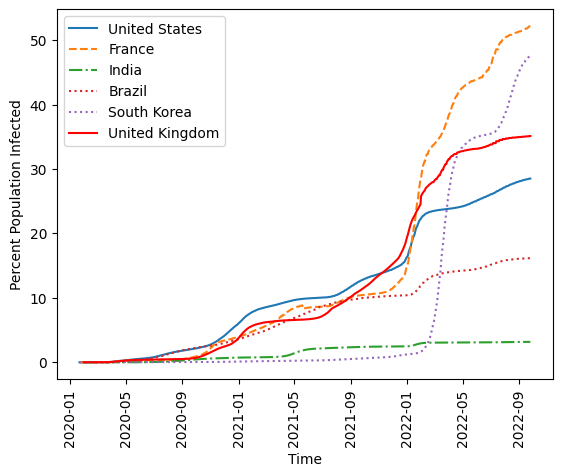

In [50]:
# importing package
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from matplotlib.pyplot import figure

#get data from query
us_date = pd.to_datetime(case_v_population.loc[case_v_population['Location'] == 'United States']['date'])
us_infection = case_v_population.loc[case_v_population['Location'] == 'United States']['CasePercentage']

india_date = pd.to_datetime(case_v_population.loc[case_v_population['Location'] == 'India']['date'])
india_infection = case_v_population.loc[case_v_population['Location'] == 'India']['CasePercentage']

france_date = pd.to_datetime(case_v_population.loc[case_v_population['Location'] == 'France']['date'])
france_infection = case_v_population.loc[case_v_population['Location'] == 'France']['CasePercentage']

brazil_date = pd.to_datetime(case_v_population.loc[case_v_population['Location'] == 'Brazil']['date'])
brazil_infection = case_v_population.loc[case_v_population['Location'] == 'Brazil']['CasePercentage']

germany_date = pd.to_datetime(case_v_population.loc[case_v_population['Location'] == 'Germany']['date'])
germany_infection = case_v_population.loc[case_v_population['Location'] == 'Germany']['CasePercentage']

southkorea_date = pd.to_datetime(case_v_population.loc[case_v_population['Location'] == 'South Korea']['date'])
southkorea_infection = case_v_population.loc[case_v_population['Location'] == 'South Korea']['CasePercentage']

uk_date = pd.to_datetime(case_v_population.loc[case_v_population['Location'] == 'United Kingdom']['date'])
uk_infection = case_v_population.loc[case_v_population['Location'] == 'United Kingdom']['CasePercentage']

 # plot lines
plt.plot(us_date, us_infection, label = "United States", linestyle="-")
plt.plot(france_date, france_infection, label = "France", linestyle="--")
plt.plot(india_date, india_infection, label = "India", linestyle="-.")
plt.plot(brazil_date, brazil_infection, label = "Brazil", linestyle=":")
plt.plot(southkorea_date, southkorea_infection, label = "South Korea", linestyle=":")
plt.plot(uk_date, uk_infection, label = "United Kingdom", linestyle="-", color = "red")

#rotate dates on x-axis 90 degrees
plt.xticks(rotation=90)

plt.legend()


# Define the date format
date_form = DateFormatter("%m-%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for every 12 weeks (3 months)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=12))
plt.xlabel('Time')
plt.ylabel('Percent Population Infected')
plt.show()